# COGS 108 - Final Project 

# Overview

San Diego parks have a wide array of city-funded amenities. Which of these do San Diegans actually like?

# Name & GitHub

- Name: Eamon Jarrett-Mann
- GitHub Username: EamonJarrett-Mann

# Research Question

How can the city best spend money to increase use/enjoyment of pre-existing parks?

## Background and Prior Work


Study 1) suggested that the presence of certain facilities promoted physical activity more than others: "Although grass fields and baseball fields had the most visitors, the majority of people in them were observed being sedentary (54% AND 69%, respectively). While fitness rooms had fewer visitors...more people engaged in vigrorous activity (n=158) than walking(n=57) or being sedentary (n=135)" The study assigned Energy expenditure (EE) scores to activities and showed that use different facilities created large differences in EE score. "...the highest EE score being for pools, followed by fitness rooms and basketball courts."

In a similar vein, study 2) suggests that having park events is the strongest correlation with park use and community physical activity.

Clearly, it doesn't make sense for San Diego to spend money on programs that primarily alter the habits of already active people. (Ie. get La Jolla trophy wives to attend cycling classes at community parks instead of soulcycle) So this complicates the question: which programs/facilities most encourage people who do not engage in physical activity to begin to do so? 

References (include links):
- 1)https://www.researchgate.net/profile/Edwin_Gomez6/publication/270952346_Attitudes_about_urban_nature_parks_A_case_study_of_users_and_nonusers_in_Portland_Oregon/links/5d51722ea6fdcc370a8f95c8/Attitudes-about-urban-nature-parks-A-case-study-of-users-and-nonusers-in-Portland-Oregon.pdf#page=76
- 2) https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2821457/

# Hypothesis


I think that adding more adult centers, weight rooms and tiny tot rooms will get more people to use the parks. 

# Dataset(s)


- Dataset Name: rec_centers_datasd.geojson
- Link to the dataset:  https://data.sandiego.gov/datasets/recreation-center-locations/
- Number of observations: 57
 
Dataset about the recreation facilities from the parks that have them. In particular, I will be looking at the binary variables that give the existence of certain facilities at that park.

- Dataset Name: yelp_SD_parks.csv
- Link to the dataset:  https://github.com/COGS108/individual_fa20/tree/master/data
- Number of observations: 833

Overall yelp rating and review counts for San Diego parks and recreation centers, along with other metadata that will be ignored in this analysis.


To combine the dataframes, I cleaned the names in yelp by converting Recreation to Rec in the yelp set and then joining on the park_name and rec_bldg attributes in the rec_centers dataset. I dropped all of  the ones with missing values, leaving me with only 17 observations.

# Setup

In [77]:
import pandas as pd
import geopandas
rec_cen = geopandas.read_file('/Users/eamonjarrett-mann/Documents/GitHub/individual_fa20/data/rec_centers_datasd.geojson')
yelp_rates = pd.read_csv('/Users/eamonjarrett-mann/Documents/GitHub/individual_fa20/data/yelp_SD_parks.csv')

# Data Cleaning

I took the data that seemed to be about the particular facilities contained in the rec center datatset & joined them with the yelp ratings as best I could. Other join criteria that were attempted & were inadequate include the longitude/latitude and the zip code. 

In [78]:
rec_cen = rec_cen[['rec_bldg', 'park_name','adult_ctr', 'comfort_st', 'comp_rm',
       'dance_rm', 'game_rm', 'gymnasium', 'kiln', 'kiln_rm', 'kitchen',
       'multp_rm', 'racqb_ct', 'stage', 'teen_ctr', 'tinytot_rm', 'weight_rm']]
#select relevant features
yelp_rates = yelp_rates[yelp_rates['is_closed'] == False]
#Drop out closed facilities
yelp_rates.name = yelp_rates.name.str.replace('Recreation', 'Rec')
#transform recreation to rec so they match those in the rec_cen set
yelp_rates.name = yelp_rates.name.str.lower()
rec_cen.park_name = rec_cen.park_name.str.lower()
rec_cen.rec_bldg = rec_cen.rec_bldg.str.lower()
yelp_rates = yelp_rates[['rating', 'review_count','name']]
#select relevant features
joint = rec_cen.join(yelp_rates.set_index('name'), on = 'park_name', rsuffix = '_sd', lsuffix= '_yelp').dropna()
joint = joint.append(rec_cen.join(yelp_rates.set_index('name'), on = 'rec_bldg', rsuffix = '_sd', lsuffix= '_yelp').dropna())
#combine datasets
#I noted that 'racqb_ct' and 'comfort_st' don't occur at all in the joint dataframe, they
#will not be considered
#Note: Balboa park has multiple facilities, so we will group those facilities into one row
#the facilities will be summed, as some can occur multiple times
joint = joint.groupby('park_name').agg({'adult_ctr': sum, 'comp_rm': sum, 'dance_rm' : sum, 'game_rm' : sum,
       'gymnasium' : sum, 'kiln' : sum, 'kiln_rm': sum, 'kitchen': sum, 'multp_rm': sum, 'stage': sum,
       'teen_ctr' : sum, 'tinytot_rm' : sum, 'weight_rm' : sum, 'rating' : 'min', 'review_count' : min})
print(len(joint))
joint.head()

17


,adult_ctr,comp_rm,dance_rm,game_rm,gymnasium,kiln,kiln_rm,kitchen,multp_rm,stage,teen_ctr,tinytot_rm,weight_rm,rating,review_count
park_name,,,,,,,,,,,,,,,
allied gardens community park,0,0,0,1,1,1,1,1,3,0,0,0,0,4.50,18.00
balboa park,1,0,1,1,3,1,1,1,4,0,1,0,0,5.00,"2,105.00"
canyonside community park,0,0,0,1,1,0,0,0,2,0,0,0,0,4.50,7.00
carmel valley towncenter community park,0,0,0,0,1,0,0,1,2,0,0,0,0,3.50,27.00
encanto community park,0,0,0,1,1,1,1,1,3,0,0,0,1,3.50,3.00


# Data Analysis & Results

First, let's take a look at the ratings that we we see.

Text(0, 0.5, 'Occurences')

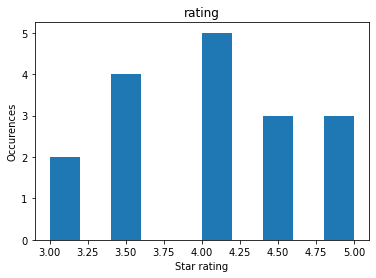

In [61]:
ax = joint.hist(column = ['rating'], grid = False, sharex=True, sharey=True)[0]#plot()
ax[0].set_xlabel('Star rating')
ax[0].set_ylabel('Occurences')

Let's take a quick look to see if any of the attributes are missing, if the max is 0 we will drop that column, as it does not make sense to look at a feature that is constantly 0.

In [62]:
pd.options.display.float_format = '{:,.2f}'.format
#thanks, stackoverflow 
#https://stackoverflow.com/questions/20937538/how-to-display-pandas-dataframe-of-floats-using-a-format-string-for-columns
joint.describe()

,adult_ctr,comp_rm,dance_rm,game_rm,gymnasium,kiln,kiln_rm,kitchen,multp_rm,stage,teen_ctr,tinytot_rm,weight_rm,rating,review_count
count,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00,17.00
mean,0.12,0.06,0.24,0.41,1.06,0.47,0.47,0.94,2.59,0.06,0.29,0.06,0.24,4.03,135.59
std,0.33,0.24,0.44,0.51,0.56,0.51,0.51,0.24,0.71,0.24,0.47,0.24,0.44,0.65,507.59
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,3.00,3.00
25%,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,2.00,0.00,0.00,0.00,0.00,3.50,5.00
50%,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,3.00,0.00,0.00,0.00,0.00,4.00,9.00
75%,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,3.00,0.00,1.00,0.00,0.00,4.50,18.00
max,1.00,1.00,1.00,1.00,3.00,1.00,1.00,1.00,4.00,1.00,1.00,1.00,1.00,5.00,"2,105.00"


In [64]:
joint[['adult_ctr', 'comp_rm', 'dance_rm', 'game_rm',
       'gymnasium', 'kiln', 'kiln_rm', 'kitchen', 'multp_rm', 'stage',
       'teen_ctr', 'tinytot_rm', 'weight_rm']].corrwith(joint.rating)

adult_ctr    -0.02
comp_rm      -0.01
dance_rm     -0.14
game_rm       0.06
gymnasium     0.17
kiln         -0.32
kiln_rm      -0.32
kitchen      -0.19
multp_rm     -0.31
stage        -0.01
teen_ctr      0.17
tinytot_rm   -0.41
weight_rm    -0.25
dtype: float64

This is funny, it seems like there is negative correlation between most of the possible facilities and the overall rating of that location. Let's take a look of the distributions of the positively correlated ones.

Text(0.5, 1.0, 'Rating with gymnasium')

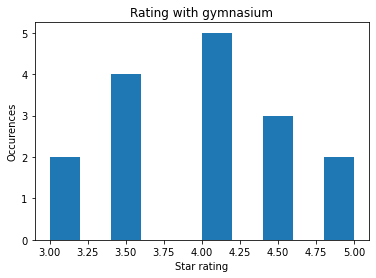

In [94]:
ax = joint[joint['gymnasium'] >= 1].hist(column = ['rating'], grid = False, sharex=True, sharey=True)[0]
ax[0].set_xlabel('Star rating')
ax[0].set_ylabel('Occurences')
ax[0].set_title('Rating with gymnasium')

This distribution is pretty much the original one seen above.

Text(0.5, 1.0, 'Rating with Teen Center')

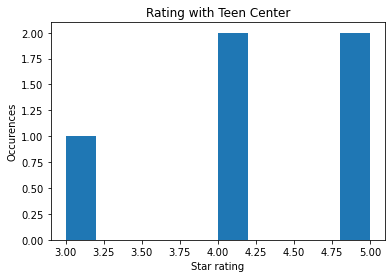

In [88]:
ax = joint[joint['teen_ctr'] == 1].hist(column = ['rating'], grid = False, sharex=True, sharey=True)[0]
ax[0].set_xlabel('Star rating')
ax[0].set_ylabel('Occurences')
ax[0].set_title('Rating with Teen Center')

In [91]:
joint[(joint['teen_ctr'] == 1) & (joint['rating'] == 3)]

,adult_ctr,comp_rm,dance_rm,game_rm,gymnasium,kiln,kiln_rm,kitchen,multp_rm,stage,teen_ctr,tinytot_rm,weight_rm,rating,review_count
park_name,,,,,,,,,,,,,,,
north park community park,1,0,1,1,1,1,1,1,3,0,1,1,0,3.00,37.00


It looks like both of teen centers and gymnasiums are associated with higher overall yelp ratings for the parks that contain them.

# Ethics & Privacy

This project does not bring up any privacy concerns that I can think of. That said, it can be ethically problematic to base the design of parks on yelp reviews. The stereotype is that yelp users tend to be yuppies (young, white & affluent), so this sample is not necessarily representative of the needs of the city. In fact, with a quick peek at the text of the reviews, all the ones I saw were in english! There are certainly San Diegans who exclusively speak other languages (namely Spanish) and they need to be considered when designing parks. This concern is magnified in neighberhoods predominantly made up of Mexican Americans, which are common in greater San Diego.

# Conclusion & Discussion

The dataset that I ended up using was extremely small (only 17 rec centers!). One of the limitations of its size is that one or two outliers can make the results seem more meaningful than they are. In this case, Balboa park may be that outlier: it has a 5 star rating with 3 gymnasiums & a teen center. Balboa park is awesome, but it obviously is not realistic to make every park in greater San Diego into Balboa park. 


Another issue with this analysis is that the actual reviews were not dealt with at all: maybe someone loved the facilities at North Park community park, but gave it a low yelp review because the hours were wrong on yelp or there were too many homeless people for their liking. Without a more in-depth analysis of people's feelings toward specific attributes of facilities, it is hard to say that their ratings are because of the facilities or the other (often silly) things that yelp reviewers complain about (e.g. best pizza of my life, but I had to wait 15 minutes, 3/5).

To deal with the bias of yelp reviewers, it may be a good idea to look at the reviews more in-depth. Social security data could be used to guess the user's age. Further, the reviews can be normalized based on how they tend to review (a user who gives 98% 5-star reviews giving a 4-star is bad, but for someone who gives 2.6 on average giving a 4-star is great). In addition, the non-age demographics of users could be evaluated. Then, you could scale use these 'fixed' reviews in ways similar to political pollsters to optimize parks by neighborhood. That is, you can use census data on the makeup of San Diego neighberhoods along with data about how certain demographics feel about park features to make the parks the best they can be for the neighborhoods they serve.  